In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
data = pd.read_csv('telco_customer_churn.csv')
data

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.dtypes

customer_ID           object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_Service         object
multiple_lines        object
internet              object
security_online       object
backup_online         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract_type         object
paperless_billing     object
payment_mode          object
charges_per_month    float64
charges_total         object
churn                 object
dtype: object

In [7]:
data.sample(5)

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
49,2954-PIBKO,Female,0,Yes,Yes,69,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),64.15,4254.1,No
333,0122-OAHPZ,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.85,511.25,Yes
4893,4432-ADRLB,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,44.65,74.9,Yes
540,6859-QNXIQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.10,8248.5,No
6620,6457-USBER,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.80,80.8,Yes


In [8]:
data.head()

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


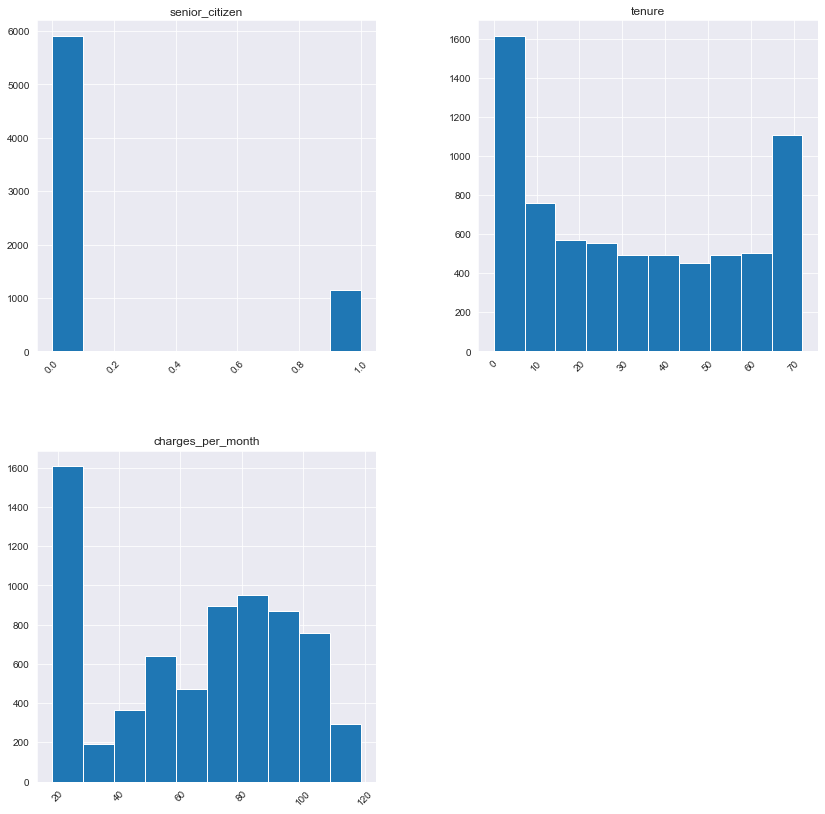

In [9]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

Tenure follows a U-shape distribution, with most having either short-term or relatively long-term tenure.

As for charges_per_month, many have a small phone bill, with a fair number having 70 dollars to 110 dollars bills per month.

In [10]:
data.describe()

,senior_citizen,tenure,charges_per_month
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
data.describe(include='object')

,customer_ID,gender,partner,dependents,phone_Service,multiple_lines,internet,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_total,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,1866-NXPSP,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3553,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


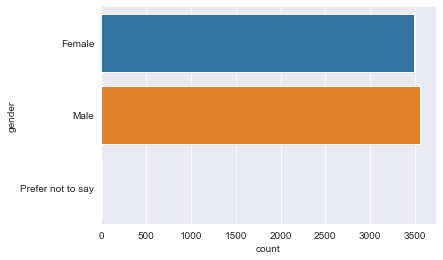

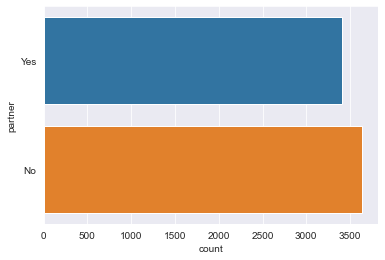

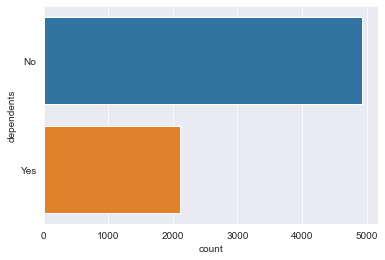

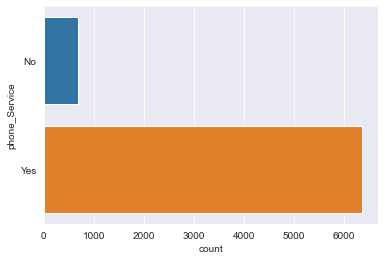

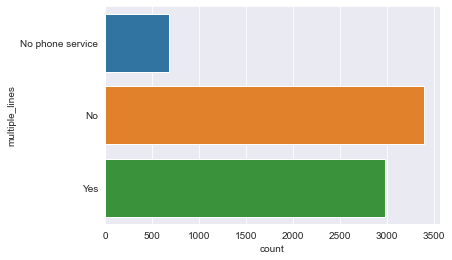

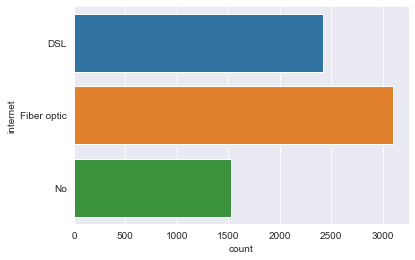

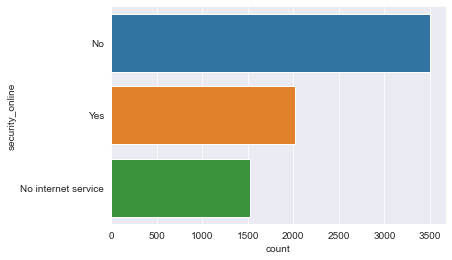

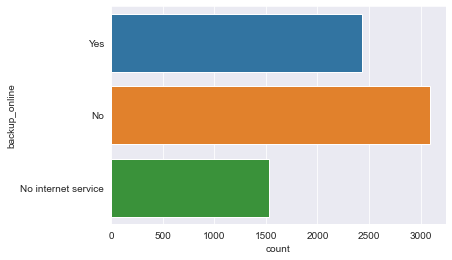

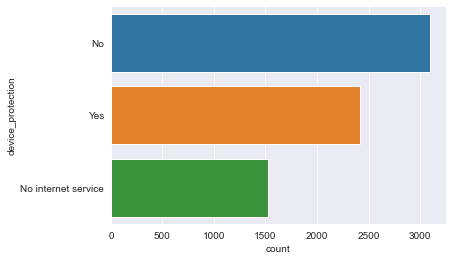

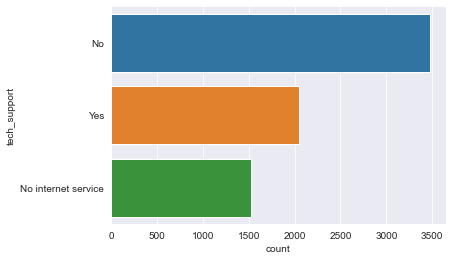

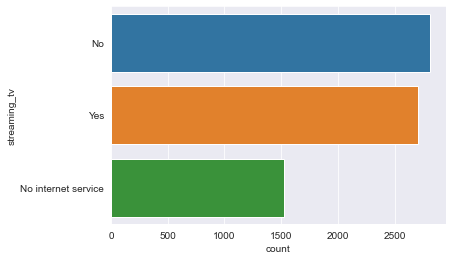

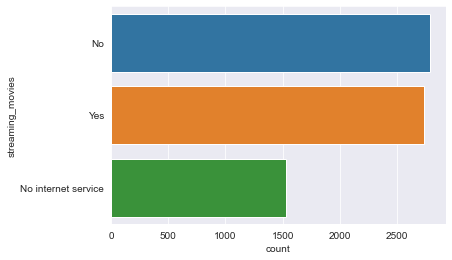

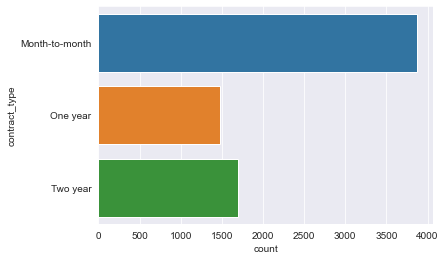

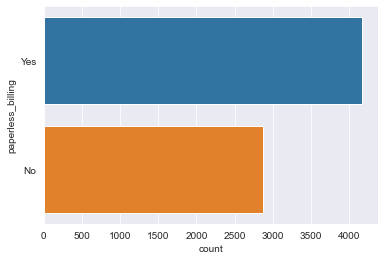

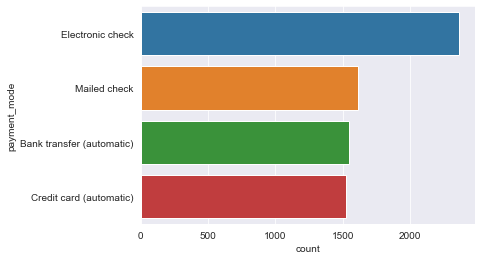

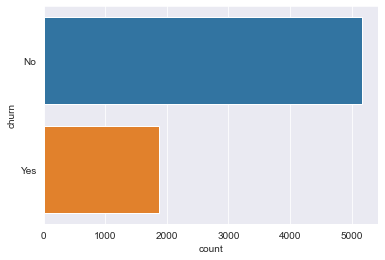

In [12]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column, data=data)
        plt.show()

Roughly equal proportion of female and male customers.

Churn rate is about 25%.

Around 40% of users have multiple lines. 

Electronic check is the most used payment mode.

Around half of all customers have short-term contracts. For long-term contracts, slightly more customers have two-year contracts vs one-year contracts. 


In [26]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 10:
        display(data.groupby(column).mean())

,senior_citizen,tenure,charges_per_month
gender,,,
Female,0.163031,32.241389,65.202454
Male,0.161554,32.488883,64.323192
Prefer not to say,0.000000,38.000000,68.491667


,senior_citizen,tenure,charges_per_month
partner,,,
No,0.156276,23.357869,61.945001
Yes,0.168430,42.017637,67.776264


,senior_citizen,tenure,charges_per_month
dependents,,,
No,0.213055,29.806000,67.002808
Yes,0.043128,38.368246,59.522156


,senior_citizen,tenure,charges_per_month
phone_Service,,,
No,0.152493,31.737537,42.028592
Yes,0.163182,32.439082,67.199041


,senior_citizen,tenure,charges_per_month
multiple_lines,,,
No,0.110029,24.134808,54.195059
No phone service,0.152493,31.737537,42.028592
Yes,0.223830,41.914507,82.036974


,senior_citizen,tenure,charges_per_month
internet,,,
DSL,0.106981,32.821561,58.102169
Fiber optic,0.268411,32.917959,91.500129
No,0.034076,30.547182,21.079194


,senior_citizen,tenure,charges_per_month
security_online,,,
No,0.230989,25.850772,75.693067
No internet service,0.034076,30.547182,21.079194
Yes,0.139673,45.046558,78.838732


,senior_citizen,tenure,charges_per_month
backup_online,,,
No,0.198834,23.680699,71.938002
No internet service,0.034076,30.547182,21.079194
Yes,0.195965,44.565253,83.081597


,senior_citizen,tenure,charges_per_month
device_protection,,,
No,0.201616,23.696931,70.601050
No internet service,0.034076,30.547182,21.079194
Yes,0.192403,44.604872,84.822254


,senior_citizen,tenure,charges_per_month
tech_support,,,
No,0.238986,25.844227,74.586683
No internet service,0.034076,30.547182,21.079194
Yes,0.127202,44.822896,80.680137


,senior_citizen,tenure,charges_per_month
streaming_tv,,,
No,0.184342,24.985409,65.387687
No internet service,0.034076,30.547182,21.079194
Yes,0.211304,41.066125,88.736738


,senior_citizen,tenure,charges_per_month
streaming_movies,,,
No,0.177738,24.712388,65.434147
No internet service,0.034076,30.547182,21.079194
Yes,0.217789,41.197291,88.475714


,senior_citizen,tenure,charges_per_month
contract_type,,,
Month-to-month,0.208258,18.036645,66.398490
One year,0.128988,42.044807,65.048608
Two year,0.085546,56.735103,60.770413


,senior_citizen,tenure,charges_per_month
paperless_billing,,,
No,0.092618,32.189067,51.992967
Yes,0.210022,32.496524,73.553776


,senior_citizen,tenure,charges_per_month
payment_mode,,,
Bank transfer (automatic),0.150907,43.656736,67.192649
Credit card (automatic),0.145204,43.269382,66.512385
Electronic check,0.251163,25.174630,76.255814
Mailed check,0.058313,21.830025,43.917060


,senior_citizen,tenure,charges_per_month
churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


In [27]:
corrs = data.corr()
corrs

,senior_citizen,tenure,charges_per_month
senior_citizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
charges_per_month,0.220173,0.247900,1.000000


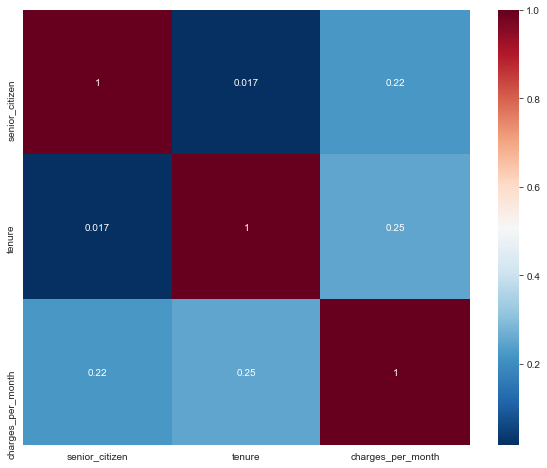

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

No obvious correlation amongst numerical variables.
Tenure could be a possible variable to look at to predict churn.

In [9]:
churn_rate = len(data[data["churn"]=="Yes"])/len(data)
print(churn_rate)

0.2653698707936959


In [6]:
f_data= data[data["gender"]=="Female"]
f_data

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


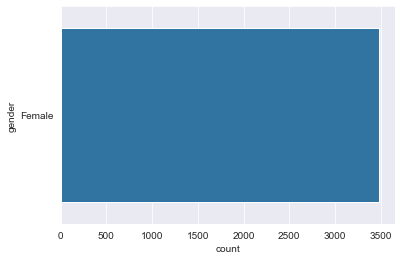

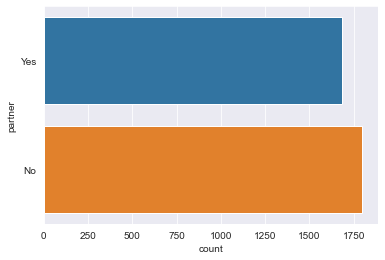

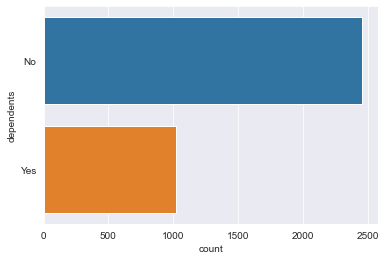

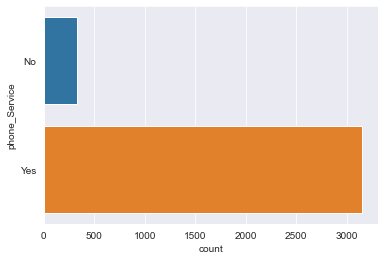

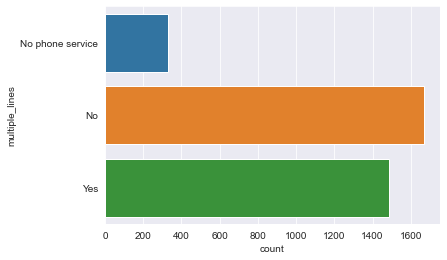

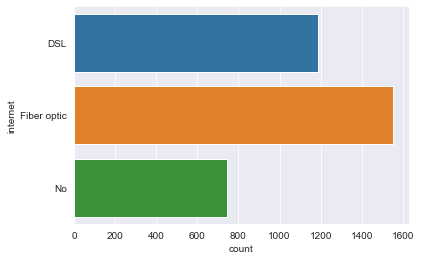

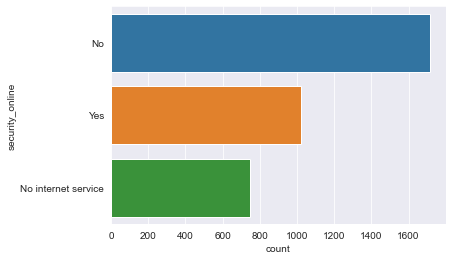

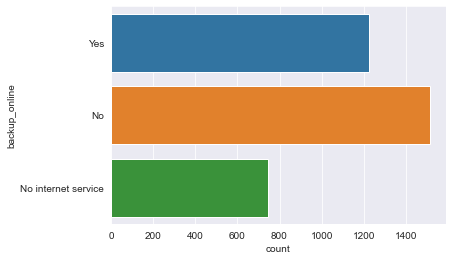

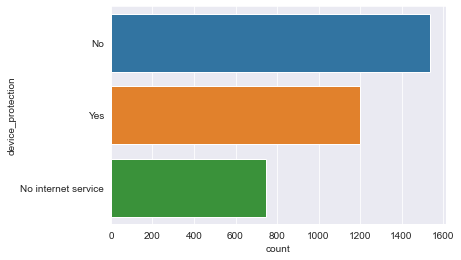

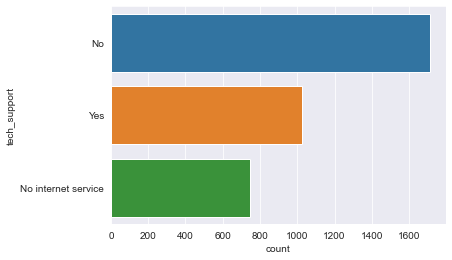

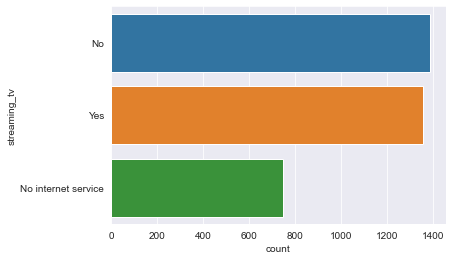

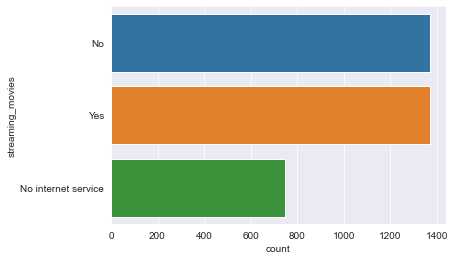

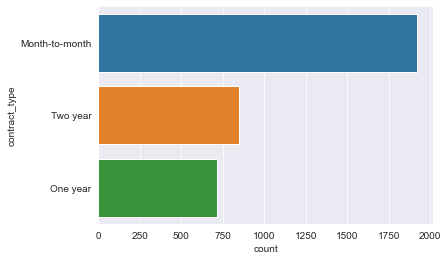

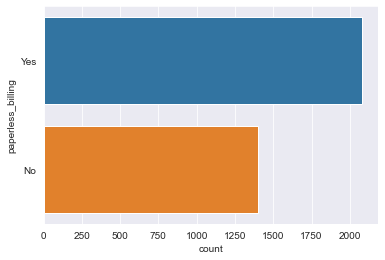

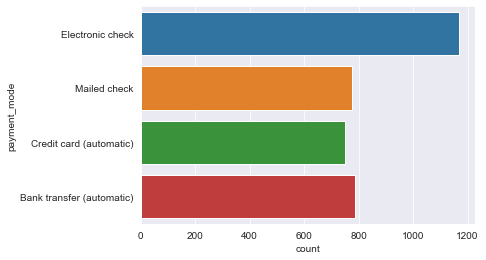

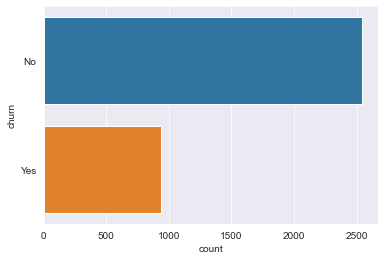

In [11]:
for column in f_data.select_dtypes(include='object'):
    if f_data[column].nunique() < 10:
        sns.countplot(y=column, data=f_data)
        plt.show()

In [16]:
female_churn_rate = len(f_data[f_data["churn"]=="Yes"])/len(f_data)
print(female_churn_rate)

0.2692307692307692


In [12]:
m_data=data[data["gender"]=="Male"]
m_data

,customer_ID,gender,senior_citizen,partner,dependents,tenure,phone_Service,multiple_lines,internet,security_online,backup_online,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_mode,charges_per_month,charges_total,churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


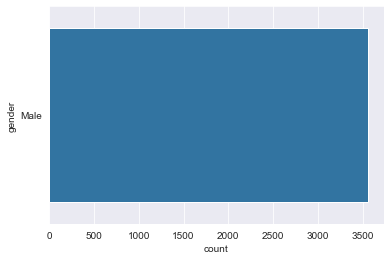

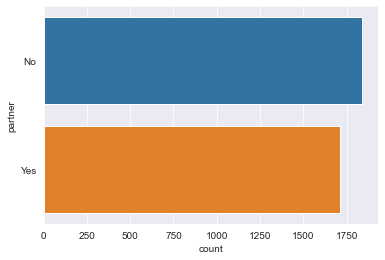

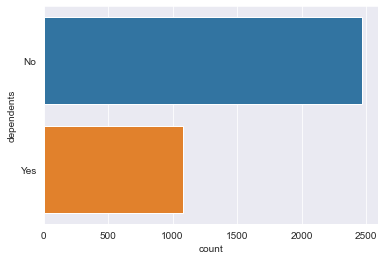

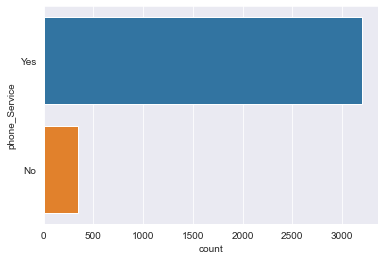

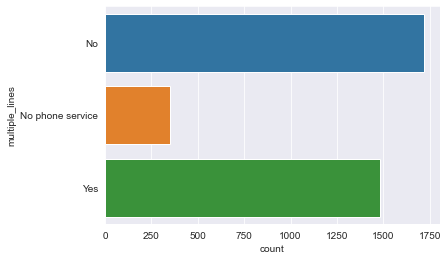

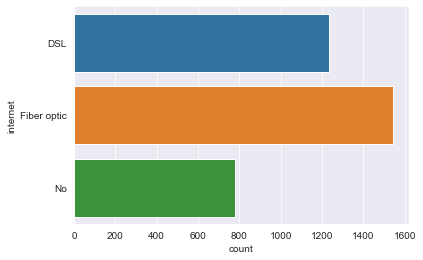

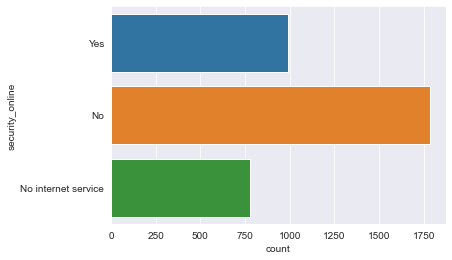

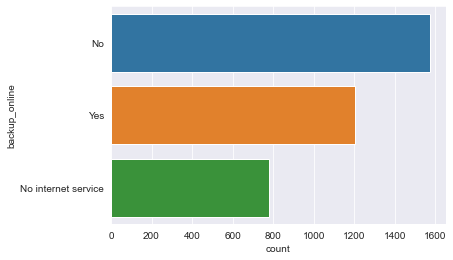

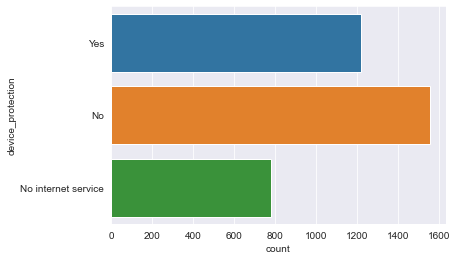

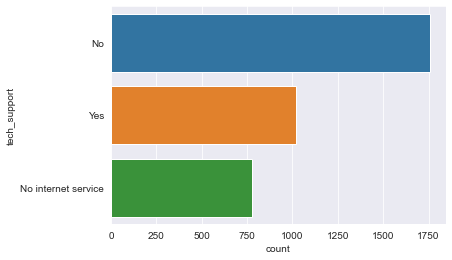

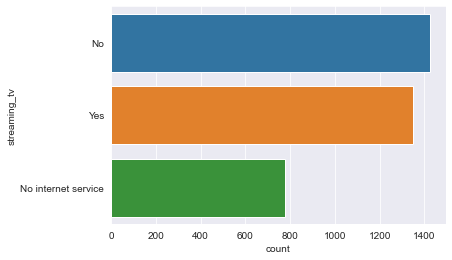

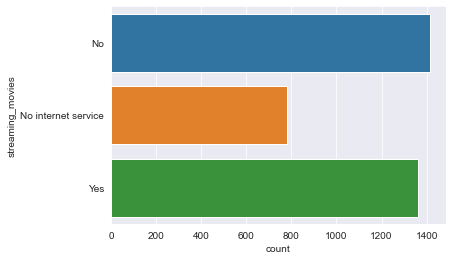

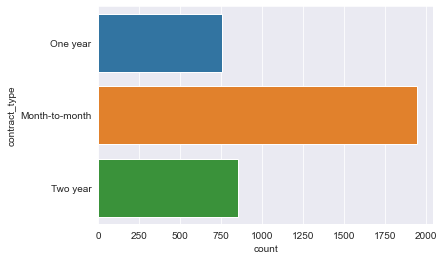

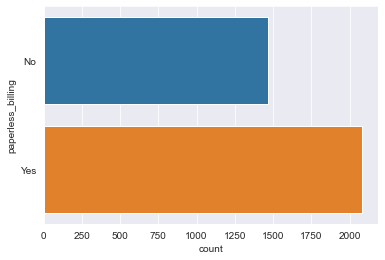

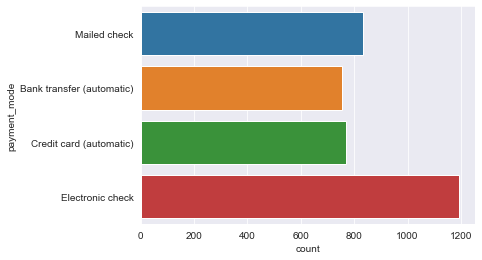

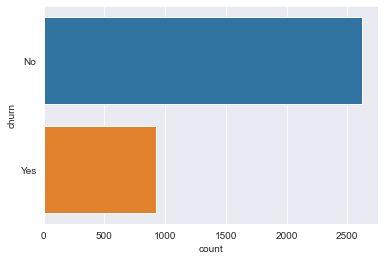

In [13]:
for column in m_data.select_dtypes(include='object'):
    if m_data[column].nunique() < 10:
        sns.countplot(y=column, data=m_data)
        plt.show()

In [14]:
male_churn_rate = len(m_data[m_data["churn"]=="Yes"])/len(m_data)
print(male_churn_rate)

0.26146918097382493


Separating the data set into the two genders, we found little disparities in almost all categories. The churn rate between the two genders are also very similar. In a nutshell, gender does not seem to be a critical determining factor of churn rate in our dataset.

Now we can do some one-hot encoding to include categorical variables in our analysis.

In [7]:
encoded_data = pd.get_dummies(data.drop(["customer_ID","charges_total"],axis=1))
encoded_data

,senior_citizen,tenure,charges_per_month,gender_Female,gender_Male,gender_Prefer not to say,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_Service_No,phone_Service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_DSL,internet_Fiber optic,internet_No,security_online_No,security_online_No internet service,security_online_Yes,backup_online_No,backup_online_No internet service,backup_online_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,paperless_billing_No,paperless_billing_Yes,payment_mode_Bank transfer (automatic),payment_mode_Credit card (automatic),payment_mode_Electronic check,payment_mode_Mailed check,churn_No,churn_Yes
0,0,1,29.85,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


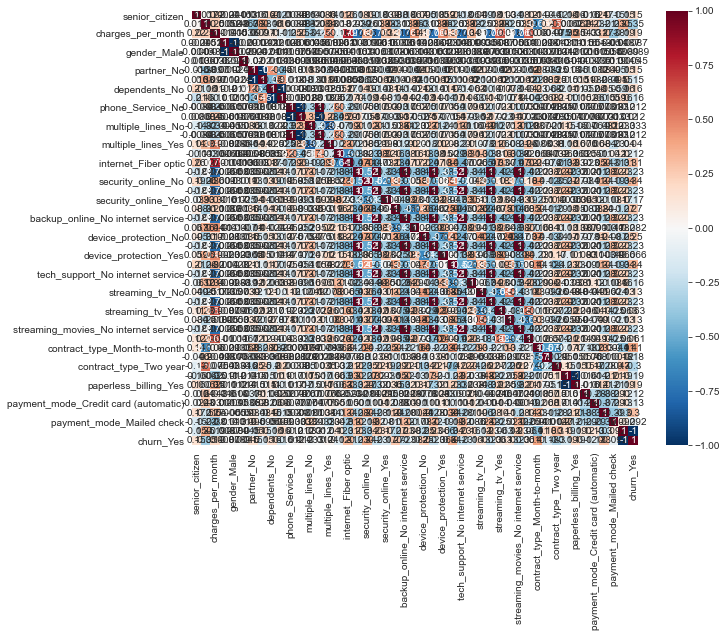

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(encoded_data.corr(), cmap='RdBu_r', annot=True)
plt.show()

Well, that wasn't very informative. But we could still see some promising correlation when looking at the bottom row to predict churn.

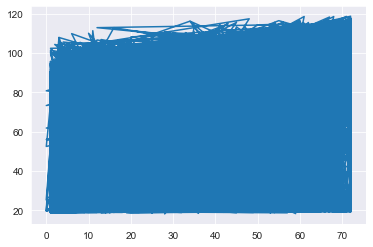

In [5]:
plt.plot(data["tenure"],data["charges_per_month"])

Future Work:

Via one-hot encoding (representing categorical variables with numerical vectors), build models to predict churn using the variables available. 

Comparing test and training error to look out for over-fitting.

Use cross-validation to estimate model performance.

In [20]:
selected_encoded= pd.get_dummies(data[["gender","partner","dependents","multiple_lines","churn"]])
selected_encoded

,gender_Female,gender_Male,gender_Prefer not to say,partner_No,partner_Yes,dependents_No,dependents_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,churn_No,churn_Yes
0,1,0,0,0,1,1,0,0,1,0,1,0
1,0,1,0,1,0,1,0,1,0,0,1,0
2,0,1,0,1,0,1,0,1,0,0,0,1
3,0,1,0,1,0,1,0,0,1,0,1,0
4,1,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,1,0,1,0,0,1,1,0
7039,1,0,0,0,1,0,1,0,0,1,1,0
7040,1,0,0,0,1,0,1,0,1,0,1,0
7041,0,1,0,0,1,1,0,0,0,1,0,1


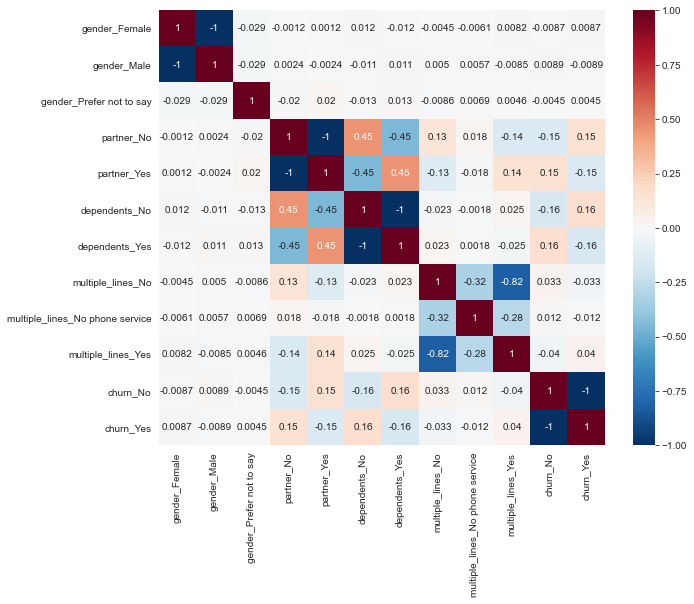

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(selected_encoded.corr(), cmap='RdBu_r', annot=True)
plt.show()

Having dependents is negatively correlated with churn (-0.16).

Having a partner is also negatively correlated with churn (-0.15).

One’s gender has very little correlation with churn.